In [6]:
import sys, os, pickle
sys.path.append('/home/om2382/vanilla-rtrl/')
from cluster import *
from continual_learning import *
from core import *
from dynamics import *
from functions import *
from gen_data import *
from learning_algorithms import *
from optimizers import *
from plotting import *
from torch_tools import *
from wrappers import *
import matplotlib.pyplot as plt
import torch
from torch.optim.lr_scheduler import ExponentialLR

In [7]:
### --- SET UP ALL CONFIGS --- ###
from itertools import product
n_seeds = 50
macro_configs = config_generator()
micro_configs = tuple(product(macro_configs, list(range(n_seeds))))

In [ ]:
root_name = 'BPTT_CDM_b200_50_examples_ctx0'
file_names = []
for params, i_seed in micro_configs:
    
    #if i_seed <= 7:
    #    continue
    
    np.random.seed(i_seed)
    T_trial = 100
    task = Context_Dependent_Decision_Task(T_trial=T_trial, input_var=0.1, report_cue=True)
    N_train = 1000000
    N_test = 20000
    checkpoint_interval = 5
    data = task.gen_data(N_train, N_test, add_dummy_end_point=False)
    batched_data = add_batch_dimension_to_data(data, T_trial)

    ### --- initialize RNN paramters and RNN object --- ###
    n_in = task.n_in
    n_hidden = 32
    n_out = task.n_out

    W_in  = np.random.normal(0, np.sqrt(1/(n_in)), (n_hidden, n_in))
    W_rec = np.random.normal(0, np.sqrt(1/n_hidden), (n_hidden, n_hidden))
    W_out = np.random.normal(0, np.sqrt(1/(n_hidden)), (n_out, n_hidden))
    b_rec = np.zeros(n_hidden)
    b_out = np.zeros(n_out)

    alpha = 0.1

    rnn = Torch_RNN(W_in, W_rec, W_out, b_rec, b_out,
                    activation='tanh',
                    alpha=alpha)
    
    optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)
    scheduler = None
    checkpoints = train_torch_RNN(rnn, optimizer, batched_data,
                                  batch_size=20, n_epochs=2,
                                  L2_reg=0.0001, verbose=True,
                                  checkpoint_interval=checkpoint_interval,
                                  scheduler=scheduler)
    
    sim = Empty_Simulation()
    sim.checkpoints = checkpoints
    indices = sorted([k for k in checkpoints.keys() if type(k) != str])
    sim.checkpoint_interval = indices[1] - indices[0]
    sim.total_time_steps = indices[-1] + sim.checkpoint_interval
    sim.rnn = checkpoints['final']['rnn']
    
    #fix context to context 0
    task.fixed_context = 0
    
    file_name = root_name + '_seed={}'.format(i_seed)
    for key in params.keys():
        file_name += '_{}={}'.format(key, str(params[key]).replace('.', ','))
        
    file_names.append(file_name)
    
    print('finish simulation: ')
    for key in params.keys():
        print('{}:, {}, seed = {}'.format(key, params[key], i_seed))
    if np.isnan(rnn.W_rec.detach().numpy()[0, 0]):
        print('MISTAKES WERE MADE')
        break
    
    
    ### --- SAVE RUN --- ###
    with open(os.path.join('saved_runs/', file_name), 'wb') as f:
        saved_run = {'sim': sim, 'task': task}
        pickle.dump(saved_run, f)

Epoch 0, Batch 0
Loss 13.39232063293457
Epoch 0, Batch 50
Loss 2.223776340484619
Epoch 0, Batch 100
Loss 2.0766053199768066
Epoch 0, Batch 150
Loss 2.0315423011779785
Epoch 0, Batch 200
Loss 1.9985861778259277
Epoch 0, Batch 250
Loss 2.0122318267822266
Epoch 0, Batch 300
Loss 1.9571894407272339
Epoch 0, Batch 350
Loss 1.9502359628677368
Epoch 0, Batch 400
Loss 1.9458322525024414
Epoch 0, Batch 450
Loss 1.9295508861541748
Epoch 1, Batch 0
Loss 1.9219849109649658
Epoch 1, Batch 50
Loss 1.9372740983963013
Epoch 1, Batch 100
Loss 1.909158706665039
Epoch 1, Batch 150
Loss 1.8796459436416626
Epoch 1, Batch 200
Loss 1.8595879077911377
Epoch 1, Batch 250
Loss 1.8298629522323608
Epoch 1, Batch 300
Loss 1.751132845878601
Epoch 1, Batch 350
Loss 1.8348456621170044
Epoch 1, Batch 400
Loss 1.764603853225708
Epoch 1, Batch 450
Loss 1.7153865098953247
Epoch 2, Batch 0
Loss 1.7678579092025757
Epoch 2, Batch 50
Loss 1.8265202045440674
Epoch 2, Batch 100
Loss 1.6881495714187622
Epoch 2, Batch 150
Loss 1

Epoch 3, Batch 100
Loss 1.5685840845108032
Epoch 3, Batch 150
Loss 1.6178826093673706
Epoch 3, Batch 200
Loss 1.4846912622451782
Epoch 3, Batch 250
Loss 1.482947587966919
Epoch 3, Batch 300
Loss 1.3941799402236938
Epoch 3, Batch 350
Loss 1.4525721073150635
Epoch 3, Batch 400
Loss 1.5312743186950684
Epoch 3, Batch 450
Loss 1.6527303457260132
finish simulation: 
Epoch 0, Batch 0
Loss 6.406123638153076
Epoch 0, Batch 50
Loss 2.275451898574829
Epoch 0, Batch 100
Loss 2.0536608695983887
Epoch 0, Batch 150
Loss 1.9609670639038086
Epoch 0, Batch 200
Loss 1.9335604906082153
Epoch 0, Batch 250
Loss 1.90677011013031
Epoch 0, Batch 300
Loss 1.9721331596374512
Epoch 0, Batch 350
Loss 1.9690759181976318
Epoch 0, Batch 400
Loss 1.9354279041290283
Epoch 0, Batch 450
Loss 1.936432123184204
Epoch 1, Batch 0
Loss 1.8539313077926636
Epoch 1, Batch 50
Loss 1.8651881217956543
Epoch 1, Batch 100
Loss 1.940985918045044
Epoch 1, Batch 150
Loss 1.8320695161819458
Epoch 1, Batch 200
Loss 1.8316749334335327
Epoc

Epoch 2, Batch 150
Loss 1.90147066116333
Epoch 2, Batch 200
Loss 1.9112279415130615
Epoch 2, Batch 250
Loss 1.8895658254623413
Epoch 2, Batch 300
Loss 1.8974355459213257
Epoch 2, Batch 350
Loss 1.898282527923584
Epoch 2, Batch 400
Loss 1.8999282121658325
Epoch 2, Batch 450
Loss 1.847773790359497
Epoch 3, Batch 0
Loss 1.8576138019561768
Epoch 3, Batch 50
Loss 1.7625393867492676
Epoch 3, Batch 100
Loss 1.8027873039245605
Epoch 3, Batch 150
Loss 1.733702301979065
Epoch 3, Batch 200
Loss 1.7623462677001953
Epoch 3, Batch 250
Loss 1.6850755214691162
Epoch 3, Batch 300
Loss 1.629165530204773
Epoch 3, Batch 350
Loss 1.6250431537628174
Epoch 3, Batch 400
Loss 1.626928687095642
Epoch 3, Batch 450
Loss 1.521973967552185
finish simulation: 
Epoch 0, Batch 0
Loss 31.687971115112305
Epoch 0, Batch 50
Loss 2.4464876651763916
Epoch 0, Batch 100
Loss 2.0250179767608643
Epoch 0, Batch 150
Loss 1.9496994018554688
Epoch 0, Batch 200
Loss 2.2353525161743164
Epoch 0, Batch 250
Loss 2.1392264366149902
Epoch

In [8]:
### --- Full cross-checkpoint analysis --- ###
root_name = 'BPTT_CDM_b200_50_examples_ctx0'
cross_topological_analysis(root_name, FP_find_FPs=True,
                           FP_KE_criterion=0.00001, FP_N=1000, ppn=16, compare_n_comp_window=1,
                           FP_context=np.eye(5)[2],
                           n_checkpoints_per_job_=50,
                           n_compare_hours=24,
                           compare_n_comp_jobs=1000,
                           compare_only=False,
                           compare_aligned_graph=False,
                           compare_node_drift=False,
                           compare_node_diff=False,
                           test_N=2000, test_save_data=False, compare_CKA=False,
                           compare_PC1=False, compare_PC2=False, compare_PC3=False,
                           compare_cross_param_ordering=['seed'],
                           results_subdir='PNAS_Paper')

rm: cannot remove ‘/home/om2382/learning-dynamics/results/PNAS_Paper/analyze_BPTT_CDM_b200_50_examples_ctx0_seed=0/result_*’: No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/.gitignore
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.idea/inspectionProfiles/
vanilla-rtrl/.idea/inspectionProfiles/profiles_settings.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/cluster/
vanilla-rtrl/cluster/__init__.py
vanilla-rtrl/cluster/close_jupyter_notebook.py
vanilla-r

vanilla-rtrl/gen_data/Mimic_RNN.py
vanilla-rtrl/gen_data/Multi_Task.py
vanilla-rtrl/gen_data/Sensorimotor_Mapping.py
vanilla-rtrl/gen_data/Sequential_MNIST.py
vanilla-rtrl/gen_data/Sine_Wave.py
vanilla-rtrl/gen_data/Task.py
vanilla-rtrl/gen_data/__init__.py
vanilla-rtrl/gen_data/gen_data_utils.py
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learning_algorithms/Future_BPTT.py
vanilla-rtrl/learning_algorithms/KF_RTRL.py
vanilla-rtrl/learning_algorithms/KeRNL.py
vanilla-rtrl/learning_algorithms/Learning_Algorithm.py
vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Rever

sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/.gitignore
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.idea/inspectionProfiles/
vanilla-rtrl/.idea/inspectionProfiles/profiles_settings.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/cluster/
vanilla-rtrl/cluster/__init__.py
vanilla-rtrl/cluster/close_jupyter_notebook.py
vanilla-rtrl/cluster/process_results.py
vanilla-rtrl/cluster/start_jupyter_notebook.py
vanilla-rtrl/cluster/submit_jobs.py
vanilla-rtrl/cluster/sync_cluster.py
v

vanilla-rtrl/plotting/misc.py
vanilla-rtrl/test/
vanilla-rtrl/test/__init__.py
vanilla-rtrl/test/test_gen_data.py
vanilla-rtrl/test/test_learning_algorithms.py
vanilla-rtrl/test/test_network.py
vanilla-rtrl/test/test_optimizers.py
vanilla-rtrl/test/test_utils.py
vanilla-rtrl/torch_tools/
vanilla-rtrl/torch_tools/__init__.py
vanilla-rtrl/torch_tools/numpy_utils.py
vanilla-rtrl/torch_tools/torch_rnn.py
vanilla-rtrl/torch_tools/train.py
vanilla-rtrl/torch_tools/train_DNI.py
vanilla-rtrl/utils/
vanilla-rtrl/utils/__init__.py
vanilla-rtrl/utils/mathematical_tools.py
vanilla-rtrl/utils/programming_tools.py
vanilla-rtrl/wrappers/
vanilla-rtrl/wrappers/__init__.py
vanilla-rtrl/wrappers/analyze_individual_checkpoint.py
vanilla-rtrl/wrappers/analyze_training_run.py
vanilla-rtrl/wrappers/compare_analyzed_checkpoints.py
vanilla-rtrl/wrappers/cross_compare_analyzed_checkpoints.py
vanilla-rtrl/wrappers/cross_topological_analysis.py
vanilla-rtrl/wrappers/get_default_args.py
vanilla-rtrl/wrappers/topo

vanilla-rtrl/functions/softmax_cross_entropy.py
vanilla-rtrl/functions/softplus.py
vanilla-rtrl/functions/tanh.py
vanilla-rtrl/gen_data/
vanilla-rtrl/gen_data/Add_Task.py
vanilla-rtrl/gen_data/Binary_Addition_Task.py
vanilla-rtrl/gen_data/Context_Dependent_Integration_Task.py
vanilla-rtrl/gen_data/Cts_Integration_Task.py
vanilla-rtrl/gen_data/Delay_Nonmatch_Task.py
vanilla-rtrl/gen_data/Discrete_Integration_Task.py
vanilla-rtrl/gen_data/Embedded_Inputs_Task.py
vanilla-rtrl/gen_data/Fixed_Point_Transition_Task.py
vanilla-rtrl/gen_data/Flip_Flop_Task.py
vanilla-rtrl/gen_data/Mimic_RNN.py
vanilla-rtrl/gen_data/Multi_Task.py
vanilla-rtrl/gen_data/Sensorimotor_Mapping.py
vanilla-rtrl/gen_data/Sequential_MNIST.py
vanilla-rtrl/gen_data/Sine_Wave.py
vanilla-rtrl/gen_data/Task.py
vanilla-rtrl/gen_data/__init__.py
vanilla-rtrl/gen_data/gen_data_utils.py
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learni

vanilla-rtrl/wrappers/cross_compare_analyzed_checkpoints.py
vanilla-rtrl/wrappers/cross_topological_analysis.py
vanilla-rtrl/wrappers/get_default_args.py
vanilla-rtrl/wrappers/topological_analysis.py

sent 449,841 bytes  received 2,351 bytes  301,461.33 bytes/sec
total size is 441,230  speedup is 0.98
rm: cannot remove ‘/home/om2382/learning-dynamics/results/PNAS_Paper/analyze_BPTT_CDM_b200_50_examples_ctx0_seed=16/result_*’: No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/.gitignore
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConf

vanilla-rtrl/gen_data/Cts_Integration_Task.py
vanilla-rtrl/gen_data/Delay_Nonmatch_Task.py
vanilla-rtrl/gen_data/Discrete_Integration_Task.py
vanilla-rtrl/gen_data/Embedded_Inputs_Task.py
vanilla-rtrl/gen_data/Fixed_Point_Transition_Task.py
vanilla-rtrl/gen_data/Flip_Flop_Task.py
vanilla-rtrl/gen_data/Mimic_RNN.py
vanilla-rtrl/gen_data/Multi_Task.py
vanilla-rtrl/gen_data/Sensorimotor_Mapping.py
vanilla-rtrl/gen_data/Sequential_MNIST.py
vanilla-rtrl/gen_data/Sine_Wave.py
vanilla-rtrl/gen_data/Task.py
vanilla-rtrl/gen_data/__init__.py
vanilla-rtrl/gen_data/gen_data_utils.py
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learning_algorithms/Future_BPTT.py
vanilla-rtrl/learning_algorithms/KF_RTRL.py
vanilla-rtrl/learning_algorithms/KeRNL.py
vanilla-rtrl/learning_algorithms/Learning_Algorithm.py
vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py



sent 449,841 bytes  received 2,351 bytes  301,461.33 bytes/sec
total size is 441,230  speedup is 0.98
rm: cannot remove ‘/home/om2382/learning-dynamics/results/PNAS_Paper/analyze_BPTT_CDM_b200_50_examples_ctx0_seed=19/result_*’: No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/.gitignore
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.idea/inspectionProfiles/
vanilla-rtrl/.idea/inspectionProfiles/profiles_settings.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla

vanilla-rtrl/gen_data/Mimic_RNN.py
vanilla-rtrl/gen_data/Multi_Task.py
vanilla-rtrl/gen_data/Sensorimotor_Mapping.py
vanilla-rtrl/gen_data/Sequential_MNIST.py
vanilla-rtrl/gen_data/Sine_Wave.py
vanilla-rtrl/gen_data/Task.py
vanilla-rtrl/gen_data/__init__.py
vanilla-rtrl/gen_data/gen_data_utils.py
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learning_algorithms/Future_BPTT.py
vanilla-rtrl/learning_algorithms/KF_RTRL.py
vanilla-rtrl/learning_algorithms/KeRNL.py
vanilla-rtrl/learning_algorithms/Learning_Algorithm.py
vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Rever

sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/.gitignore
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.idea/inspectionProfiles/
vanilla-rtrl/.idea/inspectionProfiles/profiles_settings.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/cluster/
vanilla-rtrl/cluster/__init__.py
vanilla-rtrl/cluster/close_jupyter_notebook.py
vanilla-rtrl/cluster/process_results.py
vanilla-rtrl/cluster/start_jupyter_notebook.py
vanilla-rtrl/cluster/submit_jobs.py
vanilla-rtrl/cluster/sync_cluster.py
v

vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Reverse_KF_RTRL.py
vanilla-rtrl/learning_algorithms/Stochastic_Algorithm.py
vanilla-rtrl/learning_algorithms/UORO.py
vanilla-rtrl/learning_algorithms/__init__.py
vanilla-rtrl/learning_algorithms/tmp.py
vanilla-rtrl/optimizers/
vanilla-rtrl/optimizers/Adam.py
vanilla-rtrl/optimizers/Optimizer.py
vanilla-rtrl/optimizers/SGD_Momentum.py
vanilla-rtrl/optimizers/Stochastic_Gradient_Descent.py
vanilla-rtrl/optimizers/__init__.py
vanilla-rtrl/plotting/
vanilla-rtrl/plotting/State_Space_Analysis.py
vanilla-rtrl/plotting/__init__.py
vanilla-rtrl/plotting/checkpoint_plots.py
vanilla-rtrl/plotting/misc.py
vanilla-rtrl/test/
vanilla-rtrl/test/__init__.py
vanilla-rtrl/test/te

vanilla-rtrl/.idea/inspectionProfiles/profiles_settings.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/cluster/
vanilla-rtrl/cluster/__init__.py
vanilla-rtrl/cluster/close_jupyter_notebook.py
vanilla-rtrl/cluster/process_results.py
vanilla-rtrl/cluster/start_jupyter_notebook.py
vanilla-rtrl/cluster/submit_jobs.py
vanilla-rtrl/cluster/sync_cluster.py
vanilla-rtrl/continual_learning/
vanilla-rtrl/continual_learning/Continual_Learning.py
vanilla-rtrl/continual_learning/Duncker_Method.py
vanilla-rtrl/continual_learning/Synaptic_Intelligence.py
vanilla-rtrl/continual_learning/__init__.py
vanilla-rtrl/core/
vanilla-rtrl/core/RNN.py
vanilla-rtrl/core/Simulation.py
vanilla-rtrl/core/__init__.py
vanilla-rtrl/dynamics/
vanilla-rtrl/dynamics/Dynamics.py
vanilla-rtrl/dynamics/VAE.py
vanilla-rtrl/dynamics/__init__.py
vanilla-rtrl/dynamics/checkpoint_funcs.py
vanilla-rtrl/dynamics/distances.py
vanilla-rtrl/dynamics/dynamics_utils.py
vanilla-rt

vanilla-rtrl/plotting/misc.py
vanilla-rtrl/test/
vanilla-rtrl/test/__init__.py
vanilla-rtrl/test/test_gen_data.py
vanilla-rtrl/test/test_learning_algorithms.py
vanilla-rtrl/test/test_network.py
vanilla-rtrl/test/test_optimizers.py
vanilla-rtrl/test/test_utils.py
vanilla-rtrl/torch_tools/
vanilla-rtrl/torch_tools/__init__.py
vanilla-rtrl/torch_tools/numpy_utils.py
vanilla-rtrl/torch_tools/torch_rnn.py
vanilla-rtrl/torch_tools/train.py
vanilla-rtrl/torch_tools/train_DNI.py
vanilla-rtrl/utils/
vanilla-rtrl/utils/__init__.py
vanilla-rtrl/utils/mathematical_tools.py
vanilla-rtrl/utils/programming_tools.py
vanilla-rtrl/wrappers/
vanilla-rtrl/wrappers/__init__.py
vanilla-rtrl/wrappers/analyze_individual_checkpoint.py
vanilla-rtrl/wrappers/analyze_training_run.py
vanilla-rtrl/wrappers/compare_analyzed_checkpoints.py
vanilla-rtrl/wrappers/cross_compare_analyzed_checkpoints.py
vanilla-rtrl/wrappers/cross_topological_analysis.py
vanilla-rtrl/wrappers/get_default_args.py
vanilla-rtrl/wrappers/topo

vanilla-rtrl/functions/softmax_cross_entropy.py
vanilla-rtrl/functions/softplus.py
vanilla-rtrl/functions/tanh.py
vanilla-rtrl/gen_data/
vanilla-rtrl/gen_data/Add_Task.py
vanilla-rtrl/gen_data/Binary_Addition_Task.py
vanilla-rtrl/gen_data/Context_Dependent_Integration_Task.py
vanilla-rtrl/gen_data/Cts_Integration_Task.py
vanilla-rtrl/gen_data/Delay_Nonmatch_Task.py
vanilla-rtrl/gen_data/Discrete_Integration_Task.py
vanilla-rtrl/gen_data/Embedded_Inputs_Task.py
vanilla-rtrl/gen_data/Fixed_Point_Transition_Task.py
vanilla-rtrl/gen_data/Flip_Flop_Task.py
vanilla-rtrl/gen_data/Mimic_RNN.py
vanilla-rtrl/gen_data/Multi_Task.py
vanilla-rtrl/gen_data/Sensorimotor_Mapping.py
vanilla-rtrl/gen_data/Sequential_MNIST.py
vanilla-rtrl/gen_data/Sine_Wave.py
vanilla-rtrl/gen_data/Task.py
vanilla-rtrl/gen_data/__init__.py
vanilla-rtrl/gen_data/gen_data_utils.py
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learni

vanilla-rtrl/wrappers/cross_compare_analyzed_checkpoints.py
vanilla-rtrl/wrappers/cross_topological_analysis.py
vanilla-rtrl/wrappers/get_default_args.py
vanilla-rtrl/wrappers/topological_analysis.py

sent 449,841 bytes  received 2,351 bytes  301,461.33 bytes/sec
total size is 441,230  speedup is 0.98
rm: cannot remove ‘/home/om2382/learning-dynamics/results/PNAS_Paper/analyze_BPTT_CDM_b200_50_examples_ctx0_seed=29/result_*’: No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/.gitignore
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConf

vanilla-rtrl/gen_data/Mimic_RNN.py
vanilla-rtrl/gen_data/Multi_Task.py
vanilla-rtrl/gen_data/Sensorimotor_Mapping.py
vanilla-rtrl/gen_data/Sequential_MNIST.py
vanilla-rtrl/gen_data/Sine_Wave.py
vanilla-rtrl/gen_data/Task.py
vanilla-rtrl/gen_data/__init__.py
vanilla-rtrl/gen_data/gen_data_utils.py
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learning_algorithms/Future_BPTT.py
vanilla-rtrl/learning_algorithms/KF_RTRL.py
vanilla-rtrl/learning_algorithms/KeRNL.py
vanilla-rtrl/learning_algorithms/Learning_Algorithm.py
vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Rever

sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/.gitignore
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.idea/inspectionProfiles/
vanilla-rtrl/.idea/inspectionProfiles/profiles_settings.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/cluster/
vanilla-rtrl/cluster/__init__.py
vanilla-rtrl/cluster/close_jupyter_notebook.py
vanilla-rtrl/cluster/process_results.py
vanilla-rtrl/cluster/start_jupyter_notebook.py
vanilla-rtrl/cluster/submit_jobs.py
vanilla-rtrl/cluster/sync_cluster.py
v

vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Reverse_KF_RTRL.py
vanilla-rtrl/learning_algorithms/Stochastic_Algorithm.py
vanilla-rtrl/learning_algorithms/UORO.py
vanilla-rtrl/learning_algorithms/__init__.py
vanilla-rtrl/learning_algorithms/tmp.py
vanilla-rtrl/optimizers/
vanilla-rtrl/optimizers/Adam.py
vanilla-rtrl/optimizers/Optimizer.py
vanilla-rtrl/optimizers/SGD_Momentum.py
vanilla-rtrl/optimizers/Stochastic_Gradient_Descent.py
vanilla-rtrl/optimizers/__init__.py
vanilla-rtrl/plotting/
vanilla-rtrl/plotting/State_Space_Analysis.py
vanilla-rtrl/plotting/__init__.py
vanilla-rtrl/plotting/checkpoint_plots.py
vanilla-rtrl/plotting/misc.py
vanilla-rtrl/te

vanilla-rtrl/cluster/process_results.py
vanilla-rtrl/cluster/start_jupyter_notebook.py
vanilla-rtrl/cluster/submit_jobs.py
vanilla-rtrl/cluster/sync_cluster.py
vanilla-rtrl/continual_learning/
vanilla-rtrl/continual_learning/Continual_Learning.py
vanilla-rtrl/continual_learning/Duncker_Method.py
vanilla-rtrl/continual_learning/Synaptic_Intelligence.py
vanilla-rtrl/continual_learning/__init__.py
vanilla-rtrl/core/
vanilla-rtrl/core/RNN.py
vanilla-rtrl/core/Simulation.py
vanilla-rtrl/core/__init__.py
vanilla-rtrl/dynamics/
vanilla-rtrl/dynamics/Dynamics.py
vanilla-rtrl/dynamics/VAE.py
vanilla-rtrl/dynamics/__init__.py
vanilla-rtrl/dynamics/checkpoint_funcs.py
vanilla-rtrl/dynamics/distances.py
vanilla-rtrl/dynamics/dynamics_utils.py
vanilla-rtrl/dynamics/feature_space.py
vanilla-rtrl/dynamics/metrics.py
vanilla-rtrl/dynamics/topology.py
vanilla-rtrl/dynamics/track_fixed_points.py
vanilla-rtrl/functions/
vanilla-rtrl/functions/Function.py
vanilla-rtrl/functions/__init__.py
vanilla-rtrl/fu

vanilla-rtrl/plotting/misc.py
vanilla-rtrl/test/
vanilla-rtrl/test/__init__.py
vanilla-rtrl/test/test_gen_data.py
vanilla-rtrl/test/test_learning_algorithms.py
vanilla-rtrl/test/test_network.py
vanilla-rtrl/test/test_optimizers.py
vanilla-rtrl/test/test_utils.py
vanilla-rtrl/torch_tools/
vanilla-rtrl/torch_tools/__init__.py
vanilla-rtrl/torch_tools/numpy_utils.py
vanilla-rtrl/torch_tools/torch_rnn.py
vanilla-rtrl/torch_tools/train.py
vanilla-rtrl/torch_tools/train_DNI.py
vanilla-rtrl/utils/
vanilla-rtrl/utils/__init__.py
vanilla-rtrl/utils/mathematical_tools.py
vanilla-rtrl/utils/programming_tools.py
vanilla-rtrl/wrappers/
vanilla-rtrl/wrappers/__init__.py
vanilla-rtrl/wrappers/analyze_individual_checkpoint.py
vanilla-rtrl/wrappers/analyze_training_run.py
vanilla-rtrl/wrappers/compare_analyzed_checkpoints.py
vanilla-rtrl/wrappers/cross_compare_analyzed_checkpoints.py
vanilla-rtrl/wrappers/cross_topological_analysis.py
vanilla-rtrl/wrappers/get_default_args.py
vanilla-rtrl/wrappers/topo

vanilla-rtrl/gen_data/Mimic_RNN.py
vanilla-rtrl/gen_data/Multi_Task.py
vanilla-rtrl/gen_data/Sensorimotor_Mapping.py
vanilla-rtrl/gen_data/Sequential_MNIST.py
vanilla-rtrl/gen_data/Sine_Wave.py
vanilla-rtrl/gen_data/Task.py
vanilla-rtrl/gen_data/__init__.py
vanilla-rtrl/gen_data/gen_data_utils.py
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learning_algorithms/Future_BPTT.py
vanilla-rtrl/learning_algorithms/KF_RTRL.py
vanilla-rtrl/learning_algorithms/KeRNL.py
vanilla-rtrl/learning_algorithms/Learning_Algorithm.py
vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Rever

sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/.gitignore
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.idea/inspectionProfiles/
vanilla-rtrl/.idea/inspectionProfiles/profiles_settings.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/cluster/
vanilla-rtrl/cluster/__init__.py
vanilla-rtrl/cluster/close_jupyter_notebook.py
vanilla-rtrl/cluster/process_results.py
vanilla-rtrl/cluster/start_jupyter_notebook.py
vanilla-rtrl/cluster/submit_jobs.py
vanilla-rtrl/cluster/sync_cluster.py
v

vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Reverse_KF_RTRL.py
vanilla-rtrl/learning_algorithms/Stochastic_Algorithm.py
vanilla-rtrl/learning_algorithms/UORO.py
vanilla-rtrl/learning_algorithms/__init__.py
vanilla-rtrl/learning_algorithms/tmp.py
vanilla-rtrl/optimizers/
vanilla-rtrl/optimizers/Adam.py
vanilla-rtrl/optimizers/Optimizer.py
vanilla-rtrl/optimizers/SGD_Momentum.py
vanilla-rtrl/optimizers/Stochastic_Gradient_Descent.py
vanilla-rtrl/optimizers/__init__.py
vanilla-rtrl/plotting/
vanilla-rtrl/plotting/State_Space_Analysis.py
vanilla-rtrl/plotting/__init__.py
vanilla-rtrl/plotting/checkpoint_plots.py
vanilla-rtrl/plotting/misc.py
vanilla-rtrl/te

vanilla-rtrl/gen_data/Flip_Flop_Task.py
vanilla-rtrl/gen_data/Mimic_RNN.py
vanilla-rtrl/gen_data/Multi_Task.py
vanilla-rtrl/gen_data/Sensorimotor_Mapping.py
vanilla-rtrl/gen_data/Sequential_MNIST.py
vanilla-rtrl/gen_data/Sine_Wave.py
vanilla-rtrl/gen_data/Task.py
vanilla-rtrl/gen_data/__init__.py
vanilla-rtrl/gen_data/gen_data_utils.py
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learning_algorithms/Future_BPTT.py
vanilla-rtrl/learning_algorithms/KF_RTRL.py
vanilla-rtrl/learning_algorithms/KeRNL.py
vanilla-rtrl/learning_algorithms/Learning_Algorithm.py
vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.p

sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/.gitignore
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.idea/inspectionProfiles/
vanilla-rtrl/.idea/inspectionProfiles/profiles_settings.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/cluster/
vanilla-rtrl/cluster/__init__.py
vanilla-rtrl/cluster/close_jupyter_notebook.py
vanilla-rtrl/cluster/process_results.py
vanilla-rtrl/cluster/start_jupyter_notebook.py
vanilla-rtrl/cluster/submit_jobs.py
vanilla-rtrl/cluster/sync_cluster.py
v

vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Reverse_KF_RTRL.py
vanilla-rtrl/learning_algorithms/Stochastic_Algorithm.py
vanilla-rtrl/learning_algorithms/UORO.py
vanilla-rtrl/learning_algorithms/__init__.py
vanilla-rtrl/learning_algorithms/tmp.py
vanilla-rtrl/optimizers/
vanilla-rtrl/optimizers/Adam.py
vanilla-rtrl/optimizers/Optimizer.py
vanilla-rtrl/optimizers/SGD_Momentum.py
vanilla-rtrl/optimizers/Stochastic_Gradient_Descent.py
vanilla-rtrl/optimizers/__init__.py
vanilla-rtrl/plotting/
vanilla-rtrl/plotting/State_Space_Analysis.py
vanilla-rtrl/plotting/__init__.py
vanilla-rtrl/plotting/checkpoint_plots.py
vanilla-rtrl/plotting/misc.py
vanilla-rtrl/te

vanilla-rtrl/functions/mean_squared_error.py
vanilla-rtrl/functions/relu.py
vanilla-rtrl/functions/sigmoid.py
vanilla-rtrl/functions/sigmoid_cross_entropy.py
vanilla-rtrl/functions/softmax.py
vanilla-rtrl/functions/softmax_cross_entropy.py
vanilla-rtrl/functions/softplus.py
vanilla-rtrl/functions/tanh.py
vanilla-rtrl/gen_data/
vanilla-rtrl/gen_data/Add_Task.py
vanilla-rtrl/gen_data/Binary_Addition_Task.py
vanilla-rtrl/gen_data/Context_Dependent_Integration_Task.py
vanilla-rtrl/gen_data/Cts_Integration_Task.py
vanilla-rtrl/gen_data/Delay_Nonmatch_Task.py
vanilla-rtrl/gen_data/Discrete_Integration_Task.py
vanilla-rtrl/gen_data/Embedded_Inputs_Task.py
vanilla-rtrl/gen_data/Fixed_Point_Transition_Task.py
vanilla-rtrl/gen_data/Flip_Flop_Task.py
vanilla-rtrl/gen_data/Mimic_RNN.py
vanilla-rtrl/gen_data/Multi_Task.py
vanilla-rtrl/gen_data/Sensorimotor_Mapping.py
vanilla-rtrl/gen_data/Sequential_MNIST.py
vanilla-rtrl/gen_data/Sine_Wave.py
vanilla-rtrl/gen_data/Task.py
vanilla-rtrl/gen_data/__in

vanilla-rtrl/wrappers/cross_compare_analyzed_checkpoints.py
vanilla-rtrl/wrappers/cross_topological_analysis.py
vanilla-rtrl/wrappers/get_default_args.py
vanilla-rtrl/wrappers/topological_analysis.py

sent 449,841 bytes  received 2,351 bytes  301,461.33 bytes/sec
total size is 441,230  speedup is 0.98
rm: cannot remove ‘/home/om2382/learning-dynamics/results/PNAS_Paper/analyze_BPTT_CDM_b200_50_examples_ctx0_seed=48/result_*’: No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/.gitignore
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConf

vanilla-rtrl/gen_data/Mimic_RNN.py
vanilla-rtrl/gen_data/Multi_Task.py
vanilla-rtrl/gen_data/Sensorimotor_Mapping.py
vanilla-rtrl/gen_data/Sequential_MNIST.py
vanilla-rtrl/gen_data/Sine_Wave.py
vanilla-rtrl/gen_data/Task.py
vanilla-rtrl/gen_data/__init__.py
vanilla-rtrl/gen_data/gen_data_utils.py
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learning_algorithms/Future_BPTT.py
vanilla-rtrl/learning_algorithms/KF_RTRL.py
vanilla-rtrl/learning_algorithms/KeRNL.py
vanilla-rtrl/learning_algorithms/Learning_Algorithm.py
vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Rever

sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/cross_compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/.gitignore
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.idea/inspectionProfiles/
vanilla-rtrl/.idea/inspectionProfiles/profiles_settings.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/cluster/
vanilla-rtrl/cluster/__init__.py
vanilla-rtrl/cluster/close_jupyter_notebook.py
vanilla-rtrl/cluster/process_results.py
vanilla-rtrl/cluster/start_jupyter_notebook.py
vanilla-rtrl/cluster/submit_jobs.py
vanilla-rtrl/cluster/sync_cluster.py
v

vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Reverse_KF_RTRL.py
vanilla-rtrl/learning_algorithms/Stochastic_Algorithm.py
vanilla-rtrl/learning_algorithms/UORO.py
vanilla-rtrl/learning_algorithms/__init__.py
vanilla-rtrl/learning_algorithms/tmp.py
vanilla-rtrl/optimizers/
vanilla-rtrl/optimizers/Adam.py
vanilla-rtrl/optimizers/Optimizer.py
vanilla-rtrl/optimizers/SGD_Momentum.py
vanilla-rtrl/optimizers/Stochastic_Gradient_Descent.py
vanilla-rtrl/optimizers/__init__.py
vanilla-rtrl/plotting/
vanilla-rtrl/plotting/State_Space_Analysis.py
vanilla-rtrl/plotting/__init__.py
vanilla-rtrl/plotting/checkpoint_plots.py
vanilla-rtrl/plotting/misc.py
vanilla-rtrl/te

vanilla-rtrl/gen_data/Mimic_RNN.py
vanilla-rtrl/gen_data/Multi_Task.py
vanilla-rtrl/gen_data/Sensorimotor_Mapping.py
vanilla-rtrl/gen_data/Sequential_MNIST.py
vanilla-rtrl/gen_data/Sine_Wave.py
vanilla-rtrl/gen_data/Task.py
vanilla-rtrl/gen_data/__init__.py
vanilla-rtrl/gen_data/gen_data_utils.py
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learning_algorithms/Future_BPTT.py
vanilla-rtrl/learning_algorithms/KF_RTRL.py
vanilla-rtrl/learning_algorithms/KeRNL.py
vanilla-rtrl/learning_algorithms/Learning_Algorithm.py
vanilla-rtrl/learning_algorithms/List_of_Gradients.py
vanilla-rtrl/learning_algorithms/Miconi_REINFORCE.py
vanilla-rtrl/learning_algorithms/Only_Output_Weights.py
vanilla-rtrl/learning_algorithms/REINFORCE.py
vanilla-rtrl/learning_algorithms/RFLO.py
vanilla-rtrl/learning_algorithms/RTRL.py
vanilla-rtrl/learning_algorithms/Random_Noise_Gradients.py
vanilla-rtrl/learning_algorithms/Rever

In [4]:
!squeue -u om2382

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
     1089417_[1-4] lkumar,bu analyze_   om2382 PD       0:00      1 (Priority)
     1089416_[1-4] lkumar,bu analyze_   om2382 PD       0:00      1 (Priority)
     1089415_[1-4] lkumar,bu analyze_   om2382 PD       0:00      1 (Priority)
     1089414_[1-4] lkumar,bu analyze_   om2382 PD       0:00      1 (Priority)
     1089413_[1-4] lkumar,bu analyze_   om2382 PD       0:00      1 (Priority)
     1089412_[1-4] lkumar,bu analyze_   om2382 PD       0:00      1 (Priority)
     1089411_[1-4] lkumar,bu analyze_   om2382 PD       0:00      1 (Priority)
     1089410_[1-4] lkumar,bu analyze_   om2382 PD       0:00      1 (Priority)
     1089409_[1-4] lkumar,bu analyze_   om2382 PD       0:00      1 (Priority)
     1089408_[1-4] lkumar,bu analyze_   om2382 PD       0:00      1 (Priority)
     1089407_[1-4] lkumar,bu analyze_   om2382 PD       0:00      1 (Priority)
     1089406_[1-4] lkumar,bu analyze_   om2382

In [5]:
!ls saved_runs/

BPTT_50_examples_ctx0_seed=0		BPTT_CDM_lr01_50_examples_ctx0_seed=36
BPTT_50_examples_ctx0_seed=1		BPTT_CDM_lr01_50_examples_ctx0_seed=37
BPTT_50_examples_ctx0_seed=10		BPTT_CDM_lr01_50_examples_ctx0_seed=38
BPTT_50_examples_ctx0_seed=11		BPTT_CDM_lr01_50_examples_ctx0_seed=39
BPTT_50_examples_ctx0_seed=12		BPTT_CDM_lr01_50_examples_ctx0_seed=4
BPTT_50_examples_ctx0_seed=13		BPTT_CDM_lr01_50_examples_ctx0_seed=40
BPTT_50_examples_ctx0_seed=14		BPTT_CDM_lr01_50_examples_ctx0_seed=41
BPTT_50_examples_ctx0_seed=15		BPTT_CDM_lr01_50_examples_ctx0_seed=42
BPTT_50_examples_ctx0_seed=16		BPTT_CDM_lr01_50_examples_ctx0_seed=43
BPTT_50_examples_ctx0_seed=17		BPTT_CDM_lr01_50_examples_ctx0_seed=44
BPTT_50_examples_ctx0_seed=18		BPTT_CDM_lr01_50_examples_ctx0_seed=45
BPTT_50_examples_ctx0_seed=19		BPTT_CDM_lr01_50_examples_ctx0_seed=46
BPTT_50_examples_ctx0_seed=2		BPTT_CDM_lr01_50_examples_ctx0_seed=47
BPTT_50_examples_ctx0_seed=20		BPTT_CDM_lr01_50_examples_ctx0_seed=48
BPTT_50_examples_ctx0_se

In [4]:
root_name = 'BPTT_50_examples_ctx0'
signal_dicts, result = unpack_cross_compare_result(root_name, checkpoint_stats={'test_loss': get_checkpoint_loss,
                                                                                'n_nodes': get_checkpoint_n_stable_FPs,
                                                                                'discriminant': get_checkpoint_cubic_discriminant,
                                                                                'lengths': get_checkpoint_maximum_cluster_distances},
                                                   results_subdir='PNAS_Paper',
                                                   multi_job_comp=True)

In [ ]:
root_name = 'length_test_loss'
signal_dicts_0, result_0 = unpack_cross_compare_result(root_name, checkpoint_stats={'test_loss': get_checkpoint_loss,
                                                                                   'n_nodes': get_checkpoint_n_stable_FPs,
                                                                                   'discriminant': get_checkpoint_cubic_discriminant,
                                                                                   'lengths': get_checkpoint_maximum_cluster_distances},
                                                       results_subdir='misc',
                                                       multi_job_comp=True)

In [ ]:
!rm ../results/misc/cross_compare_length_testloss_lr/result_combined

In [ ]:
root_name = 'three_geo_algs'
signal_geo_dicts, geo_result = unpack_cross_compare_result(root_name,
                                                           results_subdir='PNAS_Paper',
                                                           multi_job_comp=True)

In [ ]:
M = result['rec_weight_distances']
M = M + M.T
plt.figure(figsize=(11, 11))
plt.imshow(M)

In [ ]:
checkpoints['checkpoint_0'].keys()

In [ ]:
result['analysis_job_names']

In [ ]:
root_name = 'length_testloss_lr'
results_dir = '/home/om2382/learning-dynamics/results/misc'
analysis_jobs = [j for j in os.listdir(results_dir) if root_name in j and 'analyze' in j]
checkpoints_dicts_0 = {}
for job_name in analysis_jobs:
    indices_0, checkpoints_0 = unpack_analysis_results(os.path.join(results_dir, job_name))
    checkpoints_dicts_0[job_name] = {'indices': indices_0,
                                     'checkpoints': checkpoints_0}

In [ ]:
root_name = 'length_testloss_ctx1'
results_dir = '/home/om2382/learning-dynamics/results/misc'
analysis_jobs = [j for j in os.listdir(results_dir) if root_name in j and 'analyze' in j]
checkpoints_dicts_1 = {}
for job_name in analysis_jobs:
    indices_1, checkpoints_1 = unpack_analysis_results(os.path.join(results_dir, job_name))
    checkpoints_dicts_1[job_name] = {'indices': indices_1,
                                     'checkpoints': checkpoints_1}

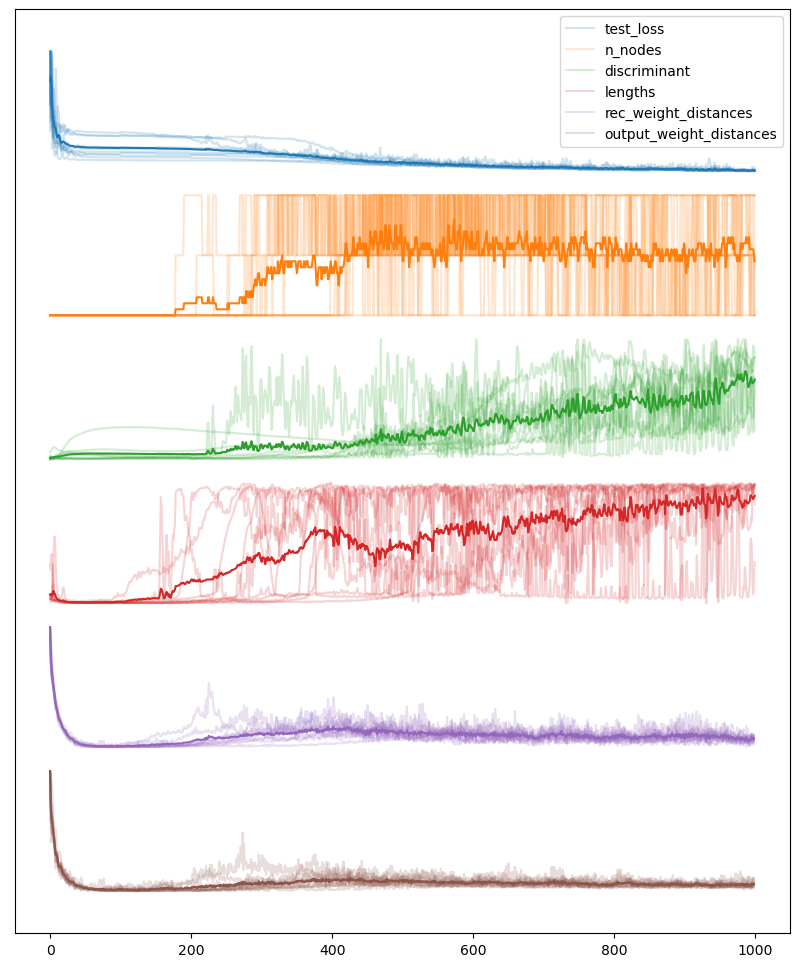

In [11]:
signal_keys = [k for k in signal_dicts.keys()]
signal_dicts_list = [signal_dicts[k] for k in signal_keys]
fig = plot_multiple_signals(signal_dicts_list, key_restriction=None, alpha=0.2)

In [ ]:
signal_keys = [k for k in signal_dicts_0.keys()]
signal_dicts_list = [signal_dicts_0[k] for k in signal_keys]
fig = plot_multiple_signals(signal_dicts_list, key_restriction=None, alpha=0.2)

In [ ]:
fig, ax = plt.subplots(4, 5)
for i_key, key in enumerate(signal_dicts):
    ax[2*(i_key//5), i_key%5].plot(np.log10(signal_dicts[key]['test_loss']), color='k')
    ax[2*(i_key//5), i_key%5].axis('off')
    ax[2*(i_key//5) + 1, i_key%5].plot(signal_dicts[key]['lengths'], color='C3')
    ax[2*(i_key//5) + 1, i_key%5].axis('off')

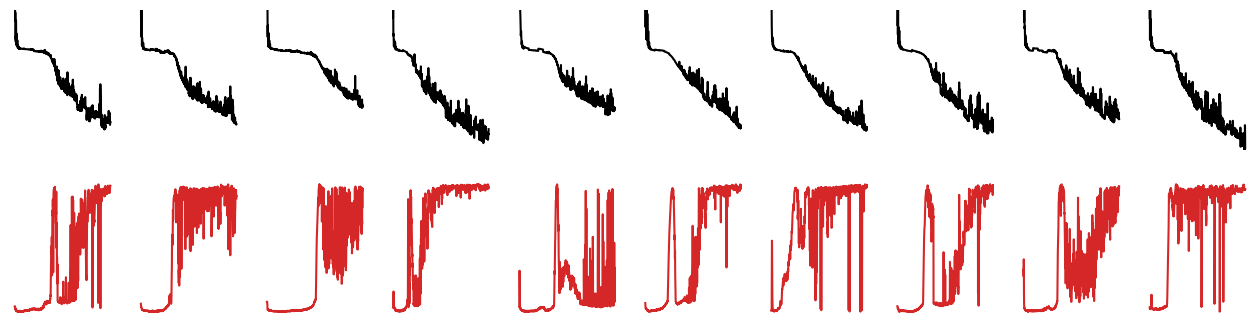

In [13]:
fig, ax = plt.subplots(2, 10, figsize=(16, 4))
for i_key, key in enumerate(signal_dicts):
    ax[0, i_key].plot(np.log10(signal_dicts[key]['test_loss']), color='k')
    ax[0, i_key].axis('off')
    ax[1, i_key].plot(signal_dicts[key]['lengths'], color='C3')
    ax[1, i_key].axis('off')
    ax[0, i_key].set_ylim([-3, -2])

In [ ]:
fig, ax = plt.subplots(4, 10, figsize=(16, 8))
for i_key, key in enumerate(signal_dicts):
    ax[0, i_key].plot(np.log10(signal_dicts[key]['test_loss']), color='k')
    ax[0, i_key].axis('off')
    ax[1, i_key].plot(signal_dicts[key]['lengths'], color='C3')
    ax[1, i_key].axis('off')
for i_key, key in enumerate(signal_dicts_0):
    ax[2, i_key].plot(np.log10(signal_dicts_0[key]['test_loss']), color='k')
    ax[2, i_key].axis('off')
    ax[3, i_key].plot(signal_dicts_0[key]['lengths'], color='C3')
    ax[3, i_key].axis('off')

In [ ]:
fig, ax = plt.subplots(10, 2, figsize=(8, 20))
for i_seed in range(10):
    for i_lr, lr in enumerate(['0,003', '0,01']):
        key = 'analyze_length_testloss_lr_seed={}_lr={}'.format(i_seed, lr)
        ax[i_seed, i_lr].plot(10 *(np.log10(signal_dicts[key]['test_loss']) + 2))
        ax[i_seed, i_lr].plot(signal_dicts[key]['lengths'])

In [ ]:
i_cp = 900
cp_0 = checkpoints_dicts_0['analyze_length_test_loss_seed=0']['checkpoints']['checkpoint_{}'.format(i_cp)]
cp_1 = checkpoints_dicts_1['analyze_length_testloss_ctx1_seed=0']['checkpoints']['checkpoint_{}'.format(i_cp)]

In [ ]:
task = Context_Dependent_Decision_Task(T_trial=100, input_var=0.1, report_cue=True)
data = task.gen_data(0, 1000)
colors = ['#0000FF', '#D62728']
col1 = '#FF0000'
col2 = '#0000FF'
col3 = '#00FF00'
col4 = '#FFFF00'
probe_colors = linearly_interpolate_colors(col1, col2, 10) + linearly_interpolate_colors(col3, col4, 10)
ssa = State_Space_Analysis(cp_0, data, n_PCs=2)
ssa = plot_checkpoint_results(cp_0, data, ssa,
                              plot_fixed_points=True,
                              plot_cluster_means=True,
                              plot_graph_structure=False,
                              plot_test_points=False,
                              n_test_samples=None,
                              T_per_sample=100,
                              test_alpha=1,
                              plot_probe=True,
                              n_probes=20,
                              probe_colors=probe_colors,
                              eig_norm_color=True,
                              graph_key='adjmat_input_1')
W_in_ = cp_0['rnn'].W_in[:,0]
W_out_ = cp_0['rnn'].W_out[0]
w_in = ssa.transform(W_in_)
w_in = w_in / norm(w_in)
w_out = ssa.transform(W_out_)
w_out = w_out / norm(w_out)
#plt.title(key + ', in-out-alignment = {}'.format(normalized_dot_product(W_in_, W_out_)))
#plt.title(key)
if True:
    #ssa.ax.plot([-w_in[0], w_in[0]],
    #            [-w_in[1], w_in[1]], color='k', linewidth=2)
    ssa.ax.plot([-w_out[0], w_out[0]],
                [-w_out[1], w_out[1]], color='g', linewidth=2)
    window_size = 1.2

In [ ]:
task = Context_Dependent_Decision_Task(T_trial=100, input_var=0.1, report_cue=True)
data = task.gen_data(0, 1000)
colors = ['#0000FF', '#D62728']
col1 = '#FF0000'
col2 = '#0000FF'
col3 = '#00FF00'
col4 = '#FFFF00'
probe_colors = linearly_interpolate_colors(col1, col2, 10) + linearly_interpolate_colors(col3, col4, 10)
ssa = State_Space_Analysis(cp_1, data, n_PCs=2)
ssa = plot_checkpoint_results(cp_1, data, ssa,
                              plot_fixed_points=True,
                              plot_cluster_means=True,
                              plot_graph_structure=False,
                              plot_test_points=False,
                              n_test_samples=None,
                              T_per_sample=100,
                              test_alpha=1,
                              plot_probe=True,
                              n_probes=20,
                              probe_colors=probe_colors,
                              eig_norm_color=True,
                              graph_key='adjmat_input_1')
W_in_ = cp_1['rnn'].W_in[:,0]
W_out_ = cp_1['rnn'].W_out[0]
w_in = ssa.transform(W_in_)
w_in = w_in / norm(w_in)
w_out = ssa.transform(W_out_)
w_out = w_out / norm(w_out)
#plt.title(key + ', in-out-alignment = {}'.format(normalized_dot_product(W_in_, W_out_)))
#plt.title(key)
if True:
    #ssa.ax.plot([-w_in[0], w_in[0]],
    #            [-w_in[1], w_in[1]], color='k', linewidth=2)
    ssa.ax.plot([-w_out[0], w_out[0]],
                [-w_out[1], w_out[1]], color='g', linewidth=2)
    window_size = 1.2

In [ ]:
np.std(cp_1['fixed_points'][np.where(cp_1['cluster_labels'] == 0)], axis=0).mean()

In [ ]:
np.std(cp_0['fixed_points'][np.where(cp_0['cluster_labels'] == 1)], axis=0).mean()

In [ ]:
M = distance.pdist(cp_0['fixed_points'][np.where(cp_0['cluster_labels'] == 1)], 'euclidean')

In [ ]:
M = distance.squareform(M)

In [ ]:
np.where(M == np.max(M))

In [ ]:
r_2 = cp_0['fixed_points'][np.where(cp_0['cluster_labels'] == 1)][57]
W_rec = cp_0['rnn'].W_rec.copy()
W_in = cp_0['rnn'].W_in.copy()
b_rec = cp_0['rnn'].b_rec.copy()
c_2 = np.eye(5)[2]
c_1 = np.eye(5)[3]
Delta_c = c_2 - c_1
h_2 = W_rec.dot(r_2) + W_in.dot(c_2) + b_rec
Delta_r = np.linalg.inv(np.eye(32) - np.diag((1 - np.tanh(h_2))**2).dot(W_rec)).dot(np.diag((1 - np.tanh(h_2))**2)).dot(W_in.dot(Delta_c))
r_1 = r_2 - Delta_r

In [ ]:
r_2_ = cp_0['fixed_points'][np.where(cp_0['cluster_labels'] == 1)][200]
W_rec = cp_0['rnn'].W_rec.copy()
W_in = cp_0['rnn'].W_in.copy()
b_rec = cp_0['rnn'].b_rec.copy()
c_2 = np.eye(5)[2]
c_1 = np.eye(5)[3]
Delta_c = c_2 - c_1
h_2 = W_rec.dot(r_2_) + W_in.dot(c_2) + b_rec
Delta_r = np.linalg.inv(np.eye(32) - np.diag((1 - np.tanh(h_2))**2).dot(W_rec)).dot(np.diag((1 - np.tanh(h_2))**2)).dot(W_in.dot(Delta_c))
r_1_ = r_2 - Delta_r

In [ ]:
M1 = distance.pdist(cp_0['fixed_points'][np.where(cp_0['cluster_labels'] == 0)], 'euclidean')
M1 = distance.squareform(M1)
np.where(M1 == np.max(M1))

In [ ]:
r_1_real = cp_1['fixed_points'][np.where(cp_1['cluster_labels'] == 0)][82]

In [ ]:
r_1_real_ = cp_1['fixed_points'][np.where(cp_1['cluster_labels'] == 0)][13]

In [ ]:
plt.plot(r_1)
plt.plot(r_1_)
plt.plot(r_1_real)
plt.plot(r_1_real_)


In [ ]:
plt.plot(signal_dicts_0['analyze_length_test_loss_seed=0']['lengths'])

In [ ]:
root_name = 'length_testloss_lr'
results_dir = '/home/om2382/learning-dynamics/results/misc'
analysis_jobs = [j for j in os.listdir(results_dir) if root_name in j and 'analyze' in j]
checkpoints_dicts = {}
for job_name in analysis_jobs:
    indices, checkpoints = unpack_analysis_results(os.path.join(results_dir, job_name))
    checkpoints_dicts[job_name] = {'indices': indices,
                                     'checkpoints': checkpoints}

In [ ]:
fig, ax = plt.subplots(4, 10, figsize=(24, 6))
for i_seed in range(10):
    for i_lr, lr in enumerate(['01', '003']):
        test_loss = []
        lengths = []
        key = 'analyze_length_testloss_lr_seed={}_lr=0,{}'.format(i_seed, lr)
        CPs = checkpoints_dicts[key]['checkpoints']
        for i_cp in range(0, 1000, 100):
            test_loss.append(np.log10(get_checkpoint_loss))
            lengths.append(get_checkpoint_maximum_cluster_distances)
        ax[2*i_lr, i_seed].plot(test_loss, 'k')
        ax[2*i_lr + 1, i_seed].plot(lengths, 'C3')